<a href="https://colab.research.google.com/github/Wallace-NMelo/AM-CIN-UFPE/blob/main/AM_Desafio_07_Pipeline_de_Ci%C3%AAncia_de_Dados_Wallace_Nascimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description



In this tutorial competition, we dig a little "deeper" into sentiment analysis. Google's Word2Vec is a deep-learning inspired method that focuses on the meaning of words. Word2Vec attempts to understand meaning and semantic relationships among words. It works in a way that is similar to deep approaches, such as recurrent neural nets or deep neural nets, but is computationally more efficient. This tutorial focuses on Word2Vec for sentiment analysis.

Sentiment analysis is a challenging subject in machine learning. People express their emotions in language that is often obscured by sarcasm, ambiguity, and plays on words, all of which could be very misleading for both humans and computers. There's another Kaggle competition for movie review sentiment analysis. In this tutorial we explore how Word2Vec can be applied to a similar problem.

[word2vec-nlp-tutorial](https://www.kaggle.com/competitions/word2vec-nlp-tutorial/overview)

## Setup


In [2]:

!pip install --upgrade pip
!pip install --user -U nltk
import nltk
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Reading the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preparing the Data


### **Data Set**
The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

####File descriptions:

**labeledTrainData** - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.  

**testData** - The test set. The tab-delimited file has a header row followed by 25,000 rows containing an id and text for each review. Your task is to predict the sentiment for each one.

**unlabeledTrainData** - An extra training set with no labels. The tab-delimited file has a header row followed by 50,000 rows containing an id and text for each review.


In [4]:
labeled_data_path = "/content/drive/MyDrive/data/AM/labeledTrainData.tsv"
unlabeled_data_path = "/content/drive/MyDrive/data/AM/unlabeledTrainData.tsv"
test_data_path = "/content/drive/MyDrive/data/AM/testData.tsv"

In [5]:
# the labeled training data
import pandas as pd
train = pd.read_csv(labeled_data_path, header=0, \
                    delimiter="\t", quoting=3)
test = pd.read_csv(test_data_path  , header=0, delimiter="\t", quoting=3 )

unlabeled_train = pd.read_csv( unlabeled_data_path , header=0,
 delimiter="\t", quoting=3 )

In [6]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [8]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
train.nunique()

id           25000
sentiment        2
review       24904
dtype: int64

/

## Deep Model

We will create a deep learning model to predict the sentiment for the each review row


In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Cleaning the Data

When considering how to clean the text, we should think about the data problem we are trying to solve. For many problems, it makes sense to remove punctuation. On the other hand, in this case, we are tackling a sentiment analysis problem, and it is possible that "!!!" or ":-(" could carry sentiment, and should be treated as words.

In [11]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text


In [12]:
train['cleaned reviews'] = train.review.apply(lambda x : clean_text(x))

In [13]:
test['cleaned reviews'] = test.review.apply(lambda x : clean_text(x))

In [14]:
train.head()

,id,sentiment,review,cleaned reviews
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",stuff go moment mj ive start listen music watc...
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",classic war world timothy hines entertain film...
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",film start manager nicholas bell give welcome ...
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",must assume praise film greatest film opera ev...
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",superbly trashy wondrously unpretentious 80 ex...


In [15]:
test["cleaned reviews"].apply(lambda x: len(x.split(" "))).mean()


126.6306

## Training the Deep Learning Model

Model using a Bidirectional LSTM architecture with additional layers for

[LSTM architecture Link](https://www.geeksforgeeks.org/bidirectional-lstm-in-nlp/)

1. **Embedding Layer**:
The model architecture starts with an Embedding layer. This layer transforms the integer-encoded words into dense vectors of fixed size (128 in this case). This embedding layer serves as the input representation for subsequent layers, capturing semantic relationships between words.

2. **Bidirectional LSTM Layer**:
A Bidirectional Long Short-Term Memory (LSTM) layer is introduced to capture contextual information from both past and future words in a sequence. With 32 units and the return_sequences=True parameter, this layer provides a comprehensive understanding of the sequential dependencies in the input data.

3. **GlobalMaxPool1D Layer**:
Following the LSTM layer, a GlobalMaxPool1D layer is added. This layer performs global max pooling over the sequence dimension, extracting the most salient features from the entire sequence. It aids in reducing the dimensionality of the data.

4. **Dense Layer with ReLU Activation**:
To introduce non-linearity to the model, a dense layer with 20 units and Rectified Linear Unit (ReLU) activation is incorporated. This layer allows the model to learn more complex patterns from the representations generated by the previous layers.

5. **Dropout Layer**:
To prevent overfitting, a Dropout layer with a dropout rate of 0.05 is applied. Dropout randomly drops a fraction of connections during training, enhancing the model's generalization capability.

6. **Output Layer**:
The final layer is a dense layer with a single unit and a sigmoid activation function. This configuration is typical for binary classification tasks, where the model outputs a probability indicating the sentiment (positive or negative).



For the model below, i have varied the values until finding the best one.

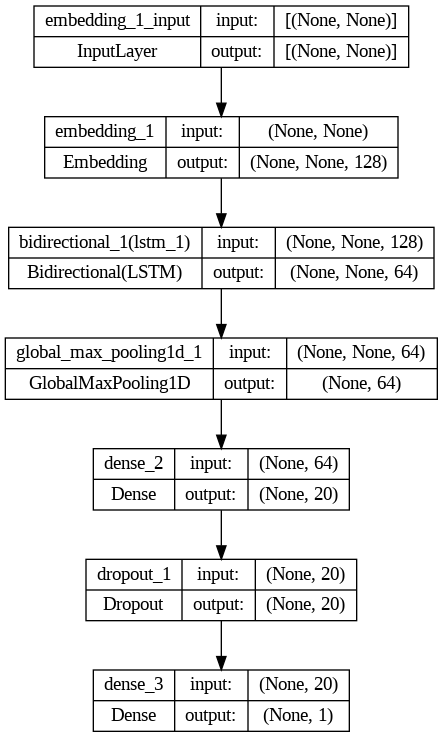

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.utils import plot_model

max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(test["cleaned reviews"])
list_tokenized_train = tokenizer.texts_to_sequences(train["cleaned reviews"])

maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = train['sentiment']

embed_size = 128
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
batch_size = 100
epochs = 3
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/3
200/200 [==============================] - 73s 346ms/step - loss: 0.4502 - accuracy: 0.7898 - val_loss: 0.3212 - val_accuracy: 0.8686
Epoch 2/3
200/200 [==============================] - 67s 334ms/step - loss: 0.2449 - accuracy: 0.9043 - val_loss: 0.3095 - val_accuracy: 0.8698
Epoch 3/3
200/200 [==============================] - 81s 406ms/step - loss: 0.1812 - accuracy: 0.9333 - val_loss: 0.3439 - val_accuracy: 0.8666


In [22]:
history = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/3
200/200 [==============================] - 69s 347ms/step - loss: 0.1327 - accuracy: 0.9543 - val_loss: 0.4275 - val_accuracy: 0.8552
Epoch 2/3
200/200 [==============================] - 70s 353ms/step - loss: 0.0974 - accuracy: 0.9683 - val_loss: 0.4350 - val_accuracy: 0.8540
Epoch 3/3
200/200 [==============================] - 68s 338ms/step - loss: 0.0704 - accuracy: 0.9791 - val_loss: 0.4910 - val_accuracy: 0.8498


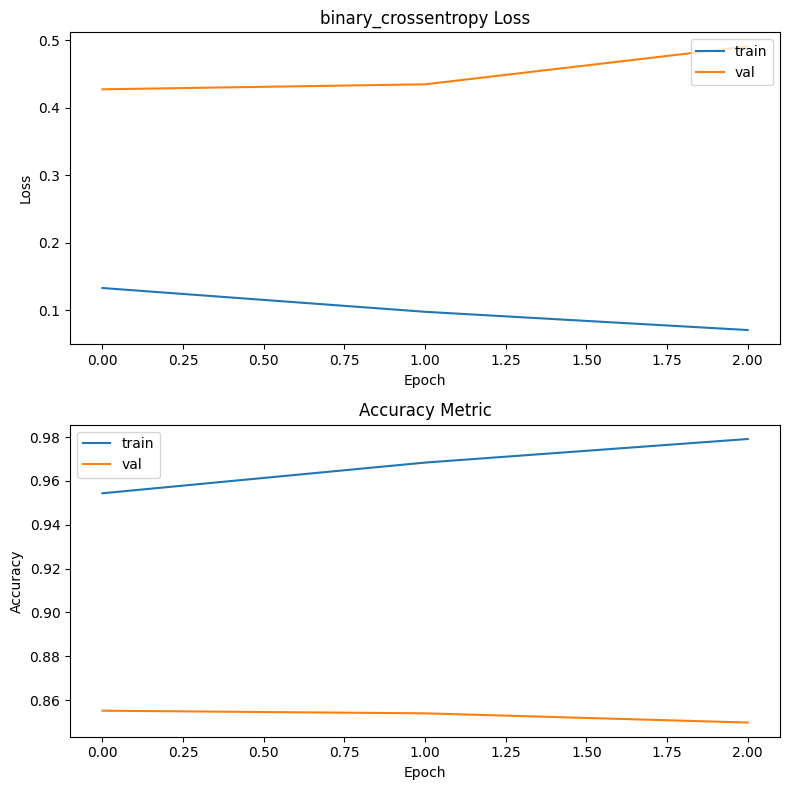

In [26]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 1, figsize=(8, 8), tight_layout=True)

# Plot Loss
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('binary_crossentropy Loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'val'], loc='upper right')

# Plot Accuracy
axs[1].plot(history.history['accuracy'])  # Change to 'accuracy' instead of 'binary_accuracy'
axs[1].plot(history.history['val_accuracy'])  # Change to 'val_accuracy' instead of 'val_binary_accuracy'
axs[1].set_title('Accuracy Metric')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'val'], loc='upper left')



## Evaluate Model

In [27]:
test.head()

,id,review,cleaned reviews
0,"""12311_10""","""Naturally in a film who's main themes are of ...",naturally film main theme mortality nostalgia ...
1,"""8348_2""","""This movie is a disaster within a disaster fi...",movie disaster within disaster film full great...
2,"""5828_4""","""All in all, this is a movie for kids. We saw ...",movie kid saw tonight child love one point kid...
3,"""7186_2""","""Afraid of the Dark left me with the impressio...",afraid dark leave impression several different...
4,"""12128_7""","""A very accurate depiction of small time mob l...",accurate depiction small time mob life film ne...


In [28]:
## creating sentiment column

test["sentiment"] = test["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)

In [29]:
test.head()

,id,review,cleaned reviews,sentiment
0,"""12311_10""","""Naturally in a film who's main themes are of ...",naturally film main theme mortality nostalgia ...,1
1,"""8348_2""","""This movie is a disaster within a disaster fi...",movie disaster within disaster film full great...,0
2,"""5828_4""","""All in all, this is a movie for kids. We saw ...",movie kid saw tonight child love one point kid...,0
3,"""7186_2""","""Afraid of the Dark left me with the impressio...",afraid dark leave impression several different...,0
4,"""12128_7""","""A very accurate depiction of small time mob l...",accurate depiction small time mob life film ne...,1


In [30]:
y_test = test["sentiment"]
list_sentences_test = test["cleaned reviews"]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)
prediction = model.predict(X_te)
y_pred = (prediction > 0.5)


from sklearn.metrics import f1_score, confusion_matrix
print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
print('Confusion matrix:')
confusion_matrix(y_pred, y_test)

782/782 [==============================] - 29s 36ms/step
F1-score: 0.8459133541759714
Confusion matrix:


array([[10788,  2083],
       [ 1712, 10417]])

Great results for the experiment. Similar for the trained model